Рейтинг шоколада

In [719]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [689]:
TRAIN = "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/chocolate_train.csv"
TEST = "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/chocolate_test_new.csv"

In [716]:
# Выгружаем данные
data_train = pd.read_csv(TRAIN)
data_train

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,Willie's Cacao,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1,Beschle (Felchlin),"Ocumare, Premier Cru, Quizas No. 2",508,2010,72%,Switzerland,3.50,,Venezuela
2,Dark Forest,Tanzania,1554,2015,70%,U.S.A.,3.00,,Tanzania
3,Brasstown aka It's Chocolate,Cooproagro,1125,2013,72%,U.S.A.,3.00,Trinitario,Dominican Republic
4,Pralus,"Java, Indonesie",32,2006,75%,France,3.50,Criollo,Indonesia
...,...,...,...,...,...,...,...,...,...
1250,Artisan du Chocolat,Madagascar,363,2009,80%,U.K.,3.00,"Criollo, Trinitario",Madagascar
1251,Marana,Cusco,1884,2016,70%,Peru,2.75,,Peru
1252,Arete,Nacional,1534,2015,68%,U.S.A.,3.50,Forastero (Nacional),Peru
1253,Fresco,"Conacado, #212, LR, SC",642,2011,72%,U.S.A.,3.50,,Dominican Republic


In [536]:
# Посмотрим на размерность
data_train.shape

(1255, 9)

In [537]:
# Посмотрим на наличие пропусков и их количество, оценим тип признаков
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1255 non-null   object 
 1   Specific Bean Origin  1255 non-null   object 
 2   REF                   1255 non-null   int64  
 3   Review                1255 non-null   int64  
 4   Cocoa Percent         1255 non-null   object 
 5   Company Location      1255 non-null   object 
 6   Rating                1255 non-null   float64
 7   Bean Type             1254 non-null   object 
 8   Broad Bean Origin     1254 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 88.4+ KB


In [538]:
# Посмотрим на распределение числовых данных

data_train.describe()

,REF,Review,Rating
count,1255.000000,1255.000000,1255.000000
mean,1045.152191,2012.382470,3.176494
std,551.284249,2.922499,0.478948
min,5.000000,2006.000000,1.000000
25%,593.000000,2010.000000,2.750000
50%,1077.000000,2013.000000,3.250000
75%,1514.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [539]:
# И категориальных признаков

data_train.describe(include='object')

,Company,Specific Bean Origin,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
count,1255,1255,1255,1255,1254,1254
unique,376,762,40,58,38,84
top,Soma,Madagascar,70%,U.S.A.,,Venezuela
freq,35,39,461,521,628,144


In [498]:
# Есть 2 None значения в Bean Type и Broad Bean Origin - заполним пустой строкой

data_train[data_train['Bean Type'].isnull() == True]

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1058,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [499]:
data_train[data_train['Broad Bean Origin'].isnull() == True]

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
697,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [717]:
# Делим на Х и у

X = data_train.drop('Rating', axis=1)
y = data_train['Rating']

In [692]:
# Заполним пропуски

for col in X.columns:
    if X[col].dtype == 'object':
        X[col].fillna('', inplace = True)

In [502]:
# Посмотрим на корреляцию категориальных признаков - V-мера Крамера

import association_metrics as am

XC = X.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
cramercv = am.CramersV(XC)
cramercv.fit()

,Company,Specific Bean Origin,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
Company,1.000000,0.771074,0.631564,0.999651,0.609295,0.600899
Specific Bean Origin,0.771074,1.000000,0.772975,0.808500,0.910495,0.977763
Cocoa Percent,0.631564,0.772975,1.000000,0.243803,0.156708,0.266725
Company Location,0.999651,0.808500,0.243803,1.000000,0.288233,0.383265
Bean Type,0.609295,0.910495,0.156708,0.288233,1.000000,0.416120
Broad Bean Origin,0.600899,0.977763,0.266725,0.383265,0.416120,1.000000


In [718]:
# Удалим признаки - Company и Specific Bean Origin в виду мультиколлинеарности с другими признаками

X.drop(['Specific Bean Origin', 'Company'], axis=1, inplace=True) 

In [530]:
# Опять посмотрим на корреляцию категориальных - теперь все ОК


XC = X.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
cramercv = am.CramersV(XC)
cramercv.fit()

,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
Cocoa Percent,1.000000,0.243803,0.156708,0.266725
Company Location,0.243803,1.000000,0.288233,0.383265
Bean Type,0.156708,0.288233,1.000000,0.416120
Broad Bean Origin,0.266725,0.383265,0.416120,1.000000


In [694]:
# Создадим новый признак Cocoa - переведем % в тип float

X['Cocoa'] = X['Cocoa Percent'].apply(lambda x: float(x.strip('%')))
X.drop('Cocoa Percent', axis=1, inplace=True) # удалим признак с %

In [695]:
X['Cocoa'].dtype

dtype('float64')

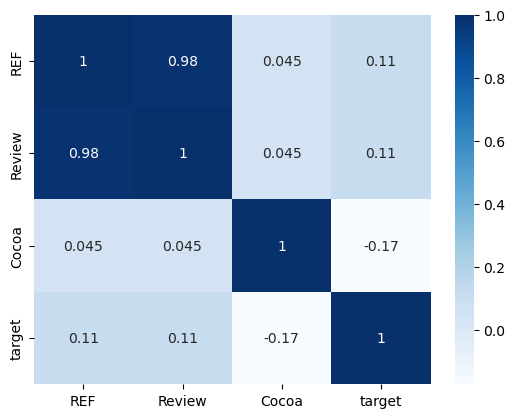

In [506]:
# Посмотрим корреляцию между числовыми признаками и таргетом

X['target'] = y

num_cols = X.select_dtypes(include='number').columns.to_list()

correl = X[num_cols].corr()
sns.heatmap(correl, cmap='Blues', annot=True)

X.drop('target', axis=1, inplace=True)

In [ ]:
# Rewiew и REF сильно коррелируют и к тому же одинаково влияют на target. Удалим один из них, например год - как менее информативный 

In [696]:
X.drop('Review', axis=1, inplace=True)


REF


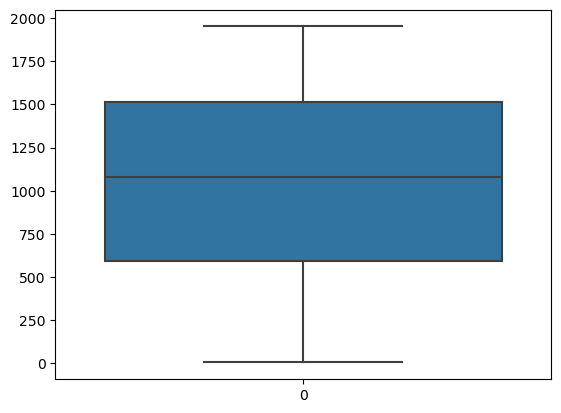

Cocoa


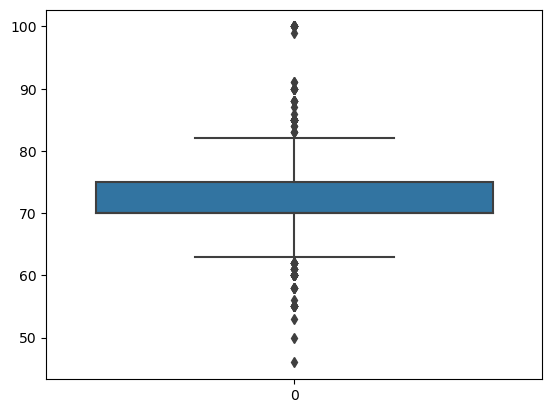

target


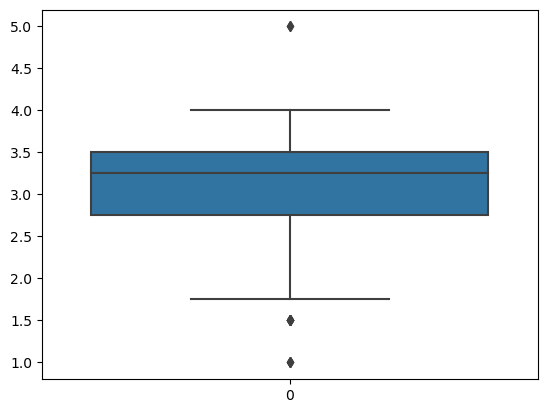

In [509]:
# Посмотрим на распределение числовых данных - выбросы есть, нужно ли их удалять - ?
num_cols = X.select_dtypes(include='number').columns.to_list()
for col in num_cols:
    print(col)
    sns.boxplot(X[col])
    plt.show()

Здесь построим baseline

In [697]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [698]:
X

,REF,Company Location,Bean Type,Broad Bean Origin,Cocoa
0,457,U.K.,Trinitario,Venezuela,72.0
1,508,Switzerland,,Venezuela,72.0
2,1554,U.S.A.,,Tanzania,70.0
3,1125,U.S.A.,Trinitario,Dominican Republic,72.0
4,32,France,Criollo,Indonesia,75.0
...,...,...,...,...,...
1250,363,U.K.,"Criollo, Trinitario",Madagascar,80.0
1251,1884,Peru,,Peru,70.0
1252,1534,U.S.A.,Forastero (Nacional),Peru,68.0
1253,642,U.S.A.,,Dominican Republic,72.0


In [699]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [ ]:
# Так как в категориальных признаках много категорий - используем Target Encoder/LeaveOneOutEncoder

In [700]:
# Достаем числовые признаки
categ_features = X.select_dtypes(exclude='number').columns.to_list()
categ_features

['Company Location', 'Bean Type', 'Broad Bean Origin']

In [701]:
# Попробуем в качестве модели - Random Forest. Линейные модели можно отсечь в связи с низкой корреляцией
# признаков и таргета


p1 = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))   
    ])

p1.fit(Xtrain, ytrain)
p1_preds = p1.predict(Xtest)
r2_score(ytest, p1_preds)

0.13785984754218505

In [560]:
# Попробуем поменять скейлер и енкодер

p2 = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features, smoothing=1)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))   
    ])

p3 = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features, smoothing=100)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))   
    ])

p4 = Pipeline([
    ('encoder', LeaveOneOutEncoder(cols=categ_features)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))   
    ])

p5 = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features, smoothing=10)),
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(random_state=42))   
    ])

p6 = Pipeline([
    ('encoder', LeaveOneOutEncoder(cols=categ_features)),
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(random_state=42))   
    ])

for i, p in enumerate([p1, p2, p3, p4, p5, p6]):
    p.fit(Xtrain, ytrain)
    preds = p.predict(Xtest)
    
    print(i+1, r2_score(ytest, preds)) 

1 0.13785984754218505
2 0.22179551160379618
3 0.12014884134926052
4 0.0032566187794389467
5 0.13651532421945534
6 0.003590479815495873


In [ ]:
# Лучше p2 - Оставляем TargetEncoder со сглаживанием = 1 и в качестве скейлера - СтандартСкейлер

In [552]:
# Подняли до 0.23, выберем p2
# Попробуем другие модели - CatBoost

p7 = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features, smoothing=1)),
    ('scaler', StandardScaler()),
    ('model', CatBoostRegressor())   
    ])

p7.fit(Xtrain, ytrain)
p7_preds = p7.predict(Xtest)
r2_score(ytest, p7_preds)

Learning rate set to 0.040551
0:	learn: 0.4682389	total: 4.13ms	remaining: 4.12s
1:	learn: 0.4666727	total: 4.58ms	remaining: 2.29s
2:	learn: 0.4636212	total: 4.94ms	remaining: 1.64s
3:	learn: 0.4614251	total: 5.28ms	remaining: 1.31s
4:	learn: 0.4591897	total: 5.75ms	remaining: 1.14s
5:	learn: 0.4574312	total: 5.97ms	remaining: 990ms
6:	learn: 0.4551716	total: 6.27ms	remaining: 890ms
7:	learn: 0.4533833	total: 6.58ms	remaining: 816ms
8:	learn: 0.4513707	total: 7.01ms	remaining: 771ms
9:	learn: 0.4495962	total: 7.32ms	remaining: 725ms
10:	learn: 0.4479020	total: 7.64ms	remaining: 687ms
11:	learn: 0.4462490	total: 7.93ms	remaining: 653ms
12:	learn: 0.4450654	total: 8.26ms	remaining: 627ms
13:	learn: 0.4434527	total: 8.56ms	remaining: 603ms
14:	learn: 0.4422405	total: 8.86ms	remaining: 582ms
15:	learn: 0.4408088	total: 9.15ms	remaining: 563ms
16:	learn: 0.4396230	total: 9.47ms	remaining: 548ms
17:	learn: 0.4385776	total: 9.78ms	remaining: 533ms
18:	learn: 0.4372566	total: 10.1ms	remaining

617:	learn: 0.2787112	total: 184ms	remaining: 113ms
618:	learn: 0.2785700	total: 184ms	remaining: 113ms
619:	learn: 0.2784333	total: 184ms	remaining: 113ms
620:	learn: 0.2783648	total: 185ms	remaining: 113ms
621:	learn: 0.2782605	total: 185ms	remaining: 112ms
622:	learn: 0.2781942	total: 185ms	remaining: 112ms
623:	learn: 0.2780928	total: 185ms	remaining: 112ms
624:	learn: 0.2779212	total: 186ms	remaining: 111ms
625:	learn: 0.2777603	total: 186ms	remaining: 111ms
626:	learn: 0.2775905	total: 186ms	remaining: 111ms
627:	learn: 0.2774551	total: 186ms	remaining: 110ms
628:	learn: 0.2773429	total: 187ms	remaining: 110ms
629:	learn: 0.2772195	total: 187ms	remaining: 110ms
630:	learn: 0.2770555	total: 187ms	remaining: 110ms
631:	learn: 0.2769971	total: 188ms	remaining: 109ms
632:	learn: 0.2768116	total: 188ms	remaining: 109ms
633:	learn: 0.2766389	total: 188ms	remaining: 109ms
634:	learn: 0.2764892	total: 188ms	remaining: 108ms
635:	learn: 0.2763388	total: 189ms	remaining: 108ms
636:	learn: 

0.22179176167136916

In [553]:
# LightGBM


p8 = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features, smoothing=1)),
    ('scaler', StandardScaler()),
    ('model', LGBMRegressor())   
    ])

p8.fit(Xtrain, ytrain)
p8_preds = p8.predict(Xtest)
r2_score(ytest, p8_preds)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268


0.16246241425247376

In [554]:
# GradBoostingRegressor

p9 = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features, smoothing=1)),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))   
    ])

p9.fit(Xtrain, ytrain)
p9_preds = p9.predict(Xtest)
r2_score(ytest, p9_preds)

0.20816843364139415

In [702]:
# Создадим пайплайн - с предобработкой

data_pipeline = Pipeline([
    ('encoder', TargetEncoder(cols=categ_features, smoothing=1)),
    ('scaler', StandardScaler())
    ])

Xtrain_preproc = pd.DataFrame(data_pipeline.fit_transform(Xtrain, ytrain))
Xtest_preproc = pd.DataFrame(data_pipeline.transform(Xtest))

In [417]:
# Подберем ГП для RF

import optuna

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 30, step = 2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    
    score = cross_val_score(RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                                  min_samples_leaf=min_samples_leaf, max_features=max_features,
                                                 ),
                           Xtrain_preproc, ytrain, cv = 3, scoring='r2', n_jobs=-1).mean()
    
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=30)

study.best_params



[I 2024-04-07 11:26:11,989] A new study created in memory with name: no-name-a21ecb5f-c608-4894-b49a-bf9784453125
/Users/aleksandrbogdanov/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:700: UserWarning: The distribution is specified by [3, 30] and step=2, but the range is not divisible by `step`. It will be replaced by [3, 29].
  warnings.warn(
[I 2024-04-07 11:26:12,280] Trial 0 finished with value: 0.0757460013957415 and parameters: {'n_estimators': 297, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 0 with value: 0.0757460013957415.
[I 2024-04-07 11:26:12,743] Trial 1 finished with value: 0.10887105449129619 and parameters: {'n_estimators': 951, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.10887105449129619.
[I 2024-04-07 11:26:12,766] Trial 2 finished with value: 0.04744990292716348 and parameters: {'n_estimators': 16, 'max_depth': 15, 'min_samples_leaf': 12, 'max_features': None}. Best i

{'n_estimators': 994,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [418]:
# Посмотрим качество модели Случайный лес с подобранными гиперпараметрами

model_rf = RandomForestRegressor(**study.best_params)
model_rf.fit(Xtrain_preproc, ytrain)
preds_rf_hyper = model_rf.predict(Xtest_preproc)
r2_score(ytest, preds_rf_hyper)

0.18236621674204445

In [419]:
# Достаем индексы категориальных признаков для CatBoost

cat_cb = np.where(X.dtypes == 'object')[0]
cat_cb

array([1, 2, 3])

In [420]:
# Подбор ГП для CatBoost

def objective_cb_new(trial):
    
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 16),
        'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1e-1, log = True)
    }
    
    model_cb_new = CatBoostRegressor(**param, verbose=False, early_stopping_rounds=30)
    model_cb_new.fit(Xtrain, ytrain, cat_features=cat_cb)
    preds_cb = model_cb_new.predict(Xtest)
    score = r2_score(ytest, preds_cb)
    
    return score

study_cb_new = optuna.create_study(direction='maximize')
study_cb_new.optimize(objective_cb_new, n_trials=30)

study_cb_new.best_params

[I 2024-04-07 11:26:43,091] A new study created in memory with name: no-name-4be7897e-ff4d-4cb4-adc0-aa4a4ba86f43
[I 2024-04-07 11:27:14,859] Trial 0 finished with value: 0.02814894307752791 and parameters: {'n_estimators': 598, 'max_depth': 15, 'learning_rate': 0.0006360999620791351}. Best is trial 0 with value: 0.02814894307752791.
[I 2024-04-07 11:27:15,031] Trial 1 finished with value: 0.09213390037466318 and parameters: {'n_estimators': 567, 'max_depth': 3, 'learning_rate': 0.0025927810608887664}. Best is trial 1 with value: 0.09213390037466318.
[I 2024-04-07 11:27:15,410] Trial 2 finished with value: 8.07555673174587e-05 and parameters: {'n_estimators': 608, 'max_depth': 6, 'learning_rate': 4.1049082945705e-06}. Best is trial 1 with value: 0.09213390037466318.
[I 2024-04-07 11:27:16,151] Trial 3 finished with value: 0.043252766168896395 and parameters: {'n_estimators': 663, 'max_depth': 8, 'learning_rate': 0.0007551998931214709}. Best is trial 1 with value: 0.09213390037466318.
[

{'n_estimators': 145, 'max_depth': 5, 'learning_rate': 0.09978904137829477}

In [421]:
# Обучим модель и посмотрим качество с подобранными гиперпараметрами

model_cb_last = CatBoostRegressor(**study_cb_new.best_params)
model_cb_last.fit(Xtrain, ytrain, cat_features=cat_cb)
preds_cb_last = model_cb_last.predict(Xtest)
score = r2_score(ytest, preds_cb_last)
score

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.17274857366855068

In [703]:
# Переведем в тип category для LGBMRegressora
Xtrain_lgbm = Xtrain.copy()
Xtest_lgbm = Xtest.copy()
for col in Xtrain_lgbm.columns:
    if Xtrain_lgbm[col].dtype == 'object':
        Xtrain_lgbm[col] = Xtrain_lgbm[col].astype('category')
        Xtest_lgbm[col] = Xtest_lgbm[col].astype('category')
        
Xtrain_lgbm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941 entries, 1030 to 1126
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   REF                941 non-null    int64   
 1   Company Location   941 non-null    category
 2   Bean Type          941 non-null    category
 3   Broad Bean Origin  941 non-null    category
 4   Cocoa              941 non-null    float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 31.2 KB


In [671]:
# Подбор ГП для LGBM

def objective_lgbm(trial):
    
        params = {'n_estimators': trial.suggest_int("n_estimators", 10, 1000),
            'max_depth': trial.suggest_int("max_depth", 1, 20),
            'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1e-1, log = True)
                 }
        #num_leaves = trial.suggest_int('num_leaves', 1, 100)
        
        model_lgbm_new = LGBMRegressor(**params, random_state=42)
        model_lgbm_new.fit(Xtrain_lgbm, ytrain)
        preds_lgbm = model_lgbm_new.predict(Xtest_lgbm)
        score = r2_score(ytest, preds_lgbm)

        return score

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=30)

study_lgbm.best_params

[I 2024-04-07 22:18:24,438] A new study created in memory with name: no-name-d74d1483-7999-473f-9e67-335bf0aa67c5
[I 2024-04-07 22:18:24,513] Trial 0 finished with value: -0.00012075603975958416 and parameters: {'n_estimators': 697, 'max_depth': 3, 'learning_rate': 1.121158298795287e-06}. Best is trial 0 with value: -0.00012075603975958416.
[I 2024-04-07 22:18:24,553] Trial 1 finished with value: 0.166975197912959 and parameters: {'n_estimators': 228, 'max_depth': 7, 'learning_rate': 0.008610292165778572}. Best is trial 1 with value: 0.166975197912959.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-07 22:18:24,673] Trial 2 finished with value: 0.0005401560724684895 and parameters: {'n_estimators': 729, 'max_depth': 11, 'learning_rate': 3.9560620688981244e-06}. Best is trial 1 with value: 0.166975197912959.
[I 2024-04-07 22:18:24,780] Trial 3 finished with value: 0.21372600183984358 and parameters: {'n_estimators': 545, 'max_depth': 18, 'learning_rate': 0.014302513808064824}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:24,813] Trial 4 finished with value: 0.0002914646420001388 and parameters: {'n_estimators': 703, 'max_depth': 3, 'learning_rate': 6.0663156819660126e-06}. Best is trial 3 with value: 0.21372600183984358.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31)

[I 2024-04-07 22:18:24,909] Trial 5 finished with value: 0.09675163076461246 and parameters: {'n_estimators': 583, 'max_depth': 10, 'learning_rate': 0.00094843294176368}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,054] Trial 6 finished with value: 0.00011234856776154434 and parameters: {'n_estimators': 976, 'max_depth': 8, 'learning_rate': 1.2904039780676116e-06}. Best is trial 3 with value: 0.21372600183984358.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31)

[I 2024-04-07 22:18:25,164] Trial 7 finished with value: 0.0022809585297626223 and parameters: {'n_estimators': 703, 'max_depth': 10, 'learning_rate': 1.3620642813897887e-05}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,169] Trial 8 finished with value: 0.002471355296756128 and parameters: {'n_estimators': 37, 'max_depth': 3, 'learning_rate': 0.0005635944894273588}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,254] Trial 9 finished with value: 0.18031870441352238 and parameters: {'n_estimators': 473, 'max_depth': 15, 'learning_rate': 0.00444939490945524}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,320] Trial 10 finished with value: 0.17755546383979448 and parameters: {'n_estimators': 318, 'max_depth': 20, 'learning_rate': 0.09862436273845504}. Best is trial 3 with value: 0.21372600183984358.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[I 2024-04-07 22:18:25,402] Trial 11 finished with value: 0.19965201687554046 and parameters: {'n_estimators': 393, 'max_depth': 17, 'learning_rate': 0.010030711015850097}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,502] Trial 12 finished with value: 0.16653181647582738 and parameters: {'n_estimators': 443, 'max_depth': 20, 'learning_rate': 0.07456359925667716}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,557] Trial 13 finished with value: 0.18921940068091248 and parameters: {'n_estimators': 300, 'max_depth': 16, 'learning_rate': 0.009930964220227786}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,587] Trial 14 finished with value: 0.0030963797807753712 and parameters: {'n_estimators': 176, 'max_depth': 16, 'learning_rate': 7.17379317127864e-05}. Best is trial 3 with value: 0.21372600183984358.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31)

[I 2024-04-07 22:18:25,759] Trial 15 finished with value: 0.18804930068025716 and parameters: {'n_estimators': 941, 'max_depth': 18, 'learning_rate': 0.0024770142739015716}. Best is trial 3 with value: 0.21372600183984358.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since y

[I 2024-04-07 22:18:25,860] Trial 16 finished with value: 0.017559744159088675 and parameters: {'n_estimators': 575, 'max_depth': 14, 'learning_rate': 0.00012305690611219834}. Best is trial 3 with value: 0.21372600183984358.
[I 2024-04-07 22:18:25,942] Trial 17 finished with value: 0.2207042465641904 and parameters: {'n_estimators': 379, 'max_depth': 13, 'learning_rate': 0.02638241687167642}. Best is trial 17 with value: 0.2207042465641904.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-04-07 22:18:26,117] Trial 18 finished with value: 0.20727917386318073 and parameters: {'n_estimators': 849, 'max_depth': 13, 'learning_rate': 0.02826610305117049}. Best is trial 17 with value: 0.2207042465641904.
[I 2024-04-07 22:18:26,235] Trial 19 finished with value: 0.22536793326350568 and parameters: {'n_estimators': 556, 'max_depth': 12, 'learning_rate': 0.03260165267414819}. Best is trial 19 with value: 0.22536793326350568.
[I 2024-04-07 22:18:26,258] Trial 20 finished with value: 0.03992826717221931 and parameters: {'n_estimators': 102, 'max_depth': 12, 'learning_rate': 0.00167990250446414}. Best is trial 19 with value: 0.22536793326350568.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-04-07 22:18:26,346] Trial 21 finished with value: 0.19607933334028405 and parameters: {'n_estimators': 507, 'max_depth': 7, 'learning_rate': 0.03167581936215072}. Best is trial 19 with value: 0.22536793326350568.
[I 2024-04-07 22:18:26,468] Trial 22 finished with value: 0.2174638581709336 and parameters: {'n_estimators': 583, 'max_depth': 18, 'learning_rate': 0.026087372602900716}. Best is trial 19 with value: 0.22536793326350568.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-07 22:18:26,551] Trial 23 finished with value: 0.21044991626223042 and parameters: {'n_estimators': 377, 'max_depth': 13, 'learning_rate': 0.032425261066934406}. Best is trial 19 with value: 0.22536793326350568.
[I 2024-04-07 22:18:26,667] Trial 24 finished with value: 0.17602294697791288 and parameters: {'n_estimators': 626, 'max_depth': 9, 'learning_rate': 0.003731943489779178}. Best is trial 19 with value: 0.22536793326350568.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't ex

[I 2024-04-07 22:18:26,771] Trial 25 finished with value: 0.1966545084191017 and parameters: {'n_estimators': 816, 'max_depth': 5, 'learning_rate': 0.04553512933263487}. Best is trial 19 with value: 0.22536793326350568.
[I 2024-04-07 22:18:26,849] Trial 26 finished with value: 0.02683081812782806 and parameters: {'n_estimators': 418, 'max_depth': 14, 'learning_rate': 0.00026371500227823796}. Best is trial 19 with value: 0.22536793326350568.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-07 22:18:26,980] Trial 27 finished with value: 0.21793450235377498 and parameters: {'n_estimators': 636, 'max_depth': 12, 'learning_rate': 0.016921365275317433}. Best is trial 19 with value: 0.22536793326350568.
[I 2024-04-07 22:18:27,038] Trial 28 finished with value: 0.18258961081063774 and parameters: {'n_estimators': 316, 'max_depth': 12, 'learning_rate': 0.006716881482494478}. Best is trial 19 with value: 0.22536793326350568.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-07 22:18:27,207] Trial 29 finished with value: 0.21472871502468538 and parameters: {'n_estimators': 840, 'max_depth': 11, 'learning_rate': 0.017874988076935244}. Best is trial 19 with value: 0.22536793326350568.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

{'n_estimators': 556, 'max_depth': 12, 'learning_rate': 0.03260165267414819}

In [672]:
# Посмотрим качество для LGBM с подобранными ГП

model_lgbm_fin = LGBMRegressor(**study_lgbm.best_params)
model_lgbm_fin.fit(Xtrain_lgbm, ytrain)
preds_lgbm = model_lgbm_fin.predict(Xtest_lgbm)
score_lgbm = r2_score(ytest, preds_lgbm)
score_lgbm

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 5
[LightGBM] [Info] Start training from score 3.178268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

0.22536793326350568

In [115]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.3 MB/s eta 0:00:00a 0:00:01


In [704]:
# Подберем ГП для XGBoost

def objective_xgb(trial):

    
        params = {'n_estimators': trial.suggest_int("n_estimators", 10, 1000),
            'max_depth': trial.suggest_int("max_depth", 1, 20),
            'learning_rate': trial.suggest_float('learning_rate', 1e-6, 1e-1, log = True),
            'max_leaves': trial.suggest_int('max_leaves', 1, 25)
                 }
        
        model_xgb = XGBRegressor(**params)
        model_xgb.fit(Xtrain_preproc, ytrain)
        preds_xgb = model_xgb.predict(Xtest_preproc)
        score = r2_score(ytest, preds_xgb)

        return score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)

study_xgb.best_params

[I 2024-04-07 22:45:53,688] A new study created in memory with name: no-name-25a430e6-c468-41de-b93e-8a5e22efd2cf
[I 2024-04-07 22:45:53,903] Trial 0 finished with value: 0.004080210385394634 and parameters: {'n_estimators': 777, 'max_depth': 5, 'learning_rate': 2.091646553430212e-05, 'max_leaves': 19}. Best is trial 0 with value: 0.004080210385394634.
[I 2024-04-07 22:45:53,994] Trial 1 finished with value: 0.053589493174109104 and parameters: {'n_estimators': 971, 'max_depth': 18, 'learning_rate': 0.0008790699812117447, 'max_leaves': 2}. Best is trial 1 with value: 0.053589493174109104.
[I 2024-04-07 22:45:54,032] Trial 2 finished with value: -0.00019854140094444084 and parameters: {'n_estimators': 389, 'max_depth': 6, 'learning_rate': 5.5911106500799845e-05, 'max_leaves': 1}. Best is trial 1 with value: 0.053589493174109104.
[I 2024-04-07 22:45:54,131] Trial 3 finished with value: 0.1330368616211446 and parameters: {'n_estimators': 964, 'max_depth': 8, 'learning_rate': 0.00267341756

{'n_estimators': 661,
 'max_depth': 11,
 'learning_rate': 0.028188232147789153,
 'max_leaves': 10}

In [705]:
# Посмотрим на качество с XGBoost

model_xgb_fin = XGBRegressor(**study_xgb.best_params)
model_xgb_fin.fit(Xtrain_preproc, ytrain)
preds_xgb = model_xgb_fin.predict(Xtest_preproc)
score_xgb = r2_score(ytest, preds_xgb)
score_xgb

0.21202712287898107

In [706]:
# Подберем ГП для классического ГБ

def objective_gb(trial):
        n_estimators = trial.suggest_int("n_estimators", 10, 1000)
        max_depth = trial.suggest_int("max_depth", 1, 20)
        learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-1, log = True)
        max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
        
        score = cross_val_score(GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                                         learning_rate=learning_rate, max_features=max_features,
                                                          ), 
                               Xtrain_preproc, ytrain, cv = 5, scoring='r2', n_jobs=-1).mean()

        return score

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=30)

study_gb.best_params

[I 2024-04-07 22:46:03,186] A new study created in memory with name: no-name-b019486b-262f-4939-a97a-51ff90693002
[I 2024-04-07 22:46:05,357] Trial 0 finished with value: -0.005323181264494115 and parameters: {'n_estimators': 936, 'max_depth': 9, 'learning_rate': 1.3110218504982672e-06, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.005323181264494115.
[I 2024-04-07 22:46:06,001] Trial 1 finished with value: -0.003405429698407536 and parameters: {'n_estimators': 261, 'max_depth': 5, 'learning_rate': 3.33204514780898e-05, 'max_features': None}. Best is trial 1 with value: -0.003405429698407536.
[I 2024-04-07 22:46:07,137] Trial 2 finished with value: -0.004423618998978762 and parameters: {'n_estimators': 550, 'max_depth': 20, 'learning_rate': 6.62068159116833e-06, 'max_features': 'sqrt'}. Best is trial 1 with value: -0.003405429698407536.
[I 2024-04-07 22:46:07,617] Trial 3 finished with value: -0.005117049491729864 and parameters: {'n_estimators': 808, 'max_depth': 7, 'learnin

{'n_estimators': 484,
 'max_depth': 2,
 'learning_rate': 0.03734583369053218,
 'max_features': 'sqrt'}

In [710]:
# Посмотрим качество Бустинга

model_gb_fin = GradientBoostingRegressor(**study_gb.best_params)
model_gb_fin.fit(Xtrain_preproc, ytrain)
preds_gb = model_gb_fin.predict(Xtest_preproc)
score_gb = r2_score(ytest, preds_gb)
score_gb

0.1980814466232954

In [677]:
# Таким образом у нас 5 моделей - Random Forest, XGBRegressor, CatBoostRegressor, LGBMRegressor, GradientBoosting
# Выберем 3 с лучшим качеством - XGB, LGBM, GB
# Простым смешиванием получаем наиболее высокое качество предсказаний )

best_weights = [0, 0, 0]
check = 0
for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        for k in np.arange(0.1, 1.1, 0.1):
            if i+j+k == 1.0:
                predictions = i*preds_xgb + j*preds_lgbm + k*preds_gb
                pr = r2_score(ytest, predictions)
                
                if pr>check:
                    best_weights[0] = i
                    best_weights[1] = j
                    best_weights[2] = k
                    check = pr

best_weights

[0.4, 0.5, 0.1]

In [678]:
best_prediction = best_weights[0]*preds_xgb + best_weights[1]*preds_lgbm + best_weights[2]*preds_gb
r2_score(ytest, best_prediction)

0.2647280719242472

Предсказания на тестовых данных

In [658]:
data_test = pd.read_csv(TEST)
data_test

,Company,Specific Bean Origin,REF,Review,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
0,Ohiyo,"San Juan Estate, Gran Couva",1594,2015,70%,U.S.A.,Trinitario,Trinidad
1,Blanxart,Organic Dark,322,2009,72%,Spain,,
2,Brazen,Maya Mountain,1518,2015,80%,U.S.A.,Trinitario,Belize
3,Patric,Madagascar,439,2009,67%,U.S.A.,Trinitario,Madagascar
4,Potomac,"Upala, Batch 12",607,2010,82%,U.S.A.,Matina,Costa Rica
...,...,...,...,...,...,...,...,...
535,Monsieur Truffe,Papaua New Guinea,1391,2014,70%,Australia,,Papua New Guinea
536,Cacao Hunters,Macondo,1816,2016,71%,Colombia,,Colombia
537,Bonnat,Maragnam,1038,2013,75%,France,,Brazil
538,Altus aka Cao Artisan,Acopagro,1728,2016,60%,U.S.A.,,Peru


In [637]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               540 non-null    object
 1   Specific Bean Origin  540 non-null    object
 2   REF                   540 non-null    int64 
 3   Review                540 non-null    int64 
 4   Cocoa Percent         540 non-null    object
 5   Company Location      540 non-null    object
 6   Bean Type             540 non-null    object
 7   Broad Bean Origin     540 non-null    object
dtypes: int64(2), object(6)
memory usage: 33.9+ KB


In [659]:
for col in data_test.columns:
    if data_test[col].dtype == 'object':
        data_test[col].fillna('', inplace = True)

In [660]:
data_test.drop(['Specific Bean Origin', 'Company'], axis=1, inplace=True) 
data_test['Cocoa'] = data_test['Cocoa Percent'].apply(lambda x: float(x.strip('%')))
data_test.drop('Cocoa Percent', axis=1, inplace=True) # удалим признак с %

data_test.drop('Review', axis=1, inplace=True)

In [661]:
data_test

,REF,Company Location,Bean Type,Broad Bean Origin,Cocoa
0,1594,U.S.A.,Trinitario,Trinidad,70.0
1,322,Spain,,,72.0
2,1518,U.S.A.,Trinitario,Belize,80.0
3,439,U.S.A.,Trinitario,Madagascar,67.0
4,607,U.S.A.,Matina,Costa Rica,82.0
...,...,...,...,...,...
535,1391,Australia,,Papua New Guinea,70.0
536,1816,Colombia,,Colombia,71.0
537,1038,France,,Brazil,75.0
538,1728,U.S.A.,,Peru,60.0


In [662]:


data_test_preproc = pd.DataFrame(data_pipeline.transform(data_test))

In [663]:
data_test_preproc

,0,1,2,3,4
0,0.989688,-0.356771,0.685893,0.001549,-0.282560
1,-1.319631,0.020516,-0.320747,-3.142861,0.036252
2,0.851710,-0.356771,0.685893,0.422817,1.311499
3,-1.107217,-0.356771,0.685893,0.730441,-0.760778
4,-0.802213,-0.356771,0.124123,-0.114847,1.630310
...,...,...,...,...,...
535,0.621141,1.993557,-0.320747,0.149176,-0.282560
536,1.392729,0.019880,-0.320747,-0.675522,-0.123154
537,-0.019731,1.215849,-0.320747,0.979799,0.514469
538,1.232965,-0.356771,-0.320747,-0.487166,-1.876619


In [664]:
# Делаем предсказания 

preds_rf_TEST = model_rf.predict(data_test_preproc)
#preds_lgbm_TEST = model_lgbm_fin.predict(data_test)
preds_xgb_TEST = model_xgb_fin.predict(data_test_preproc)
preds_gb_TEST = model_gb_fin.predict(data_test_preproc)

,REF,Company Location,Bean Type,Broad Bean Origin,Cocoa
0,1594,U.S.A.,Trinitario,Trinidad,70.0
1,322,Spain,,,72.0
2,1518,U.S.A.,Trinitario,Belize,80.0
3,439,U.S.A.,Trinitario,Madagascar,67.0
4,607,U.S.A.,Matina,Costa Rica,82.0
...,...,...,...,...,...
535,1391,Australia,,Papua New Guinea,70.0
536,1816,Colombia,,Colombia,71.0
537,1038,France,,Brazil,75.0
538,1728,U.S.A.,,Peru,60.0


In [666]:
preds_cb_TEST = model_cb_last.predict(data_test)

In [667]:
# Переведем в тип category для LGBMRegressora
data_test_lgbm = data_test.copy()

for col in data_test_lgbm.columns:
    if data_test_lgbm[col].dtype == 'object':
        data_test_lgbm[col] = data_test_lgbm[col].astype('category')
        
preds_lgbm_TEST = model_lgbm_fin.predict(data_test_lgbm)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [679]:
# финальные предсказания на тестовых данных

TEST_PREDS = 0.4*preds_xgb_TEST + 0.5*preds_lgbm_TEST + 0.1*preds_gb_TEST
TEST_PREDS

array([3.2893822 , 2.76883157, 3.09929548, 3.23855583, 3.05586739,
       2.67496224, 3.44452123, 3.24460762, 3.22836741, 2.83650724,
       3.18124736, 3.37662121, 2.98277501, 3.15400758, 2.78262004,
       3.29927121, 3.1578962 , 3.25521429, 2.90717166, 3.0909471 ,
       3.27466866, 3.18635256, 3.18239972, 3.11753501, 3.43252631,
       3.39837661, 3.34517454, 3.17356563, 3.21552957, 2.74095627,
       3.15486821, 2.70767274, 3.13097005, 2.95518259, 3.1307248 ,
       3.35527062, 3.50429069, 2.96242975, 3.29358611, 3.12094725,
       2.94606464, 3.23992734, 3.19415302, 3.28678518, 3.11552974,
       3.55034489, 3.12099025, 3.46519785, 3.30571104, 3.28851386,
       3.08506551, 3.10307939, 3.19164511, 3.26097306, 3.13237356,
       2.77367258, 3.01899812, 3.09267662, 3.22469654, 2.99515078,
       3.12360386, 3.47355318, 3.27214662, 3.31755893, 3.1416847 ,
       2.5014502 , 3.00423126, 3.41249956, 3.19855305, 3.47111572,
       3.24447368, 3.15614273, 3.43579501, 3.53689297, 3.21711

In [680]:
# Сохраняем предсказания

data_test['id'] = np.arange(len(data_test))
data_test['Rating'] = TEST_PREDS

data_test[['id','Rating']].to_csv("baseline_submission.csv", index=False)

([<matplotlib.axis.YTick at 0x2a0797350>,
 [Text(0, 0, 'REF'),
  Text(0, 1, 'Company Location'),
  Text(0, 2, 'Bean Type'),
  Text(0, 3, 'Broad Bean Origin'),
  Text(0, 4, 'Cocoa')])

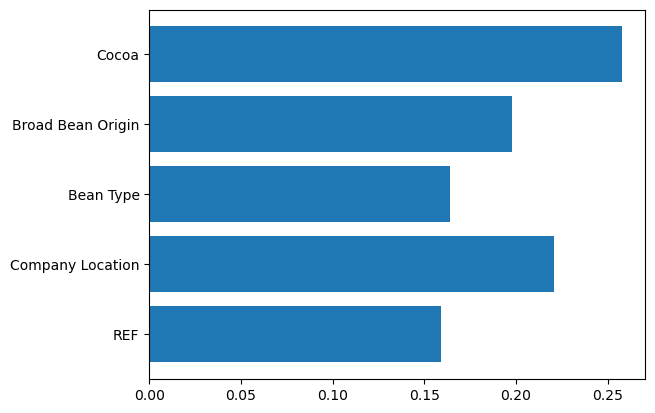

In [715]:
feat_im = model_xgb_fin.feature_importances_
names = Xtrain.columns.to_list()

plt.barh(range(len(feat_im)), feat_im, align='center')
plt.yticks(range(len(names)), names)